# Problem Statement

Your client is a financial distribution company. Over the last 10 years, they have created an offline distribution channel across the country. They sell financial products to consumers by hiring agents in their network. These agents are freelancers and get a commission when they make a product sale.

### Overview of your client onboarding process

The managers at your client are primarily responsible for recruiting agents. Once a manager has identified a potential applicant he would explain the business opportunity to the agent. Once the agent provides the consent, an application is made to your client to become an agent. In the next 3 months, this potential agent has to undergo a 7 days training at your client's branch (about sales processes and various products) and clear a subsequent examination in order to become an agent.

The problem - who are the best agents?

As it is obvious in the above process, there is a significant investment which your client makes in identifying, training, and recruiting these agents. However, there are a set of agents who do not bring in the expected resultant business. Your client is looking for help from data scientists like you to help them provide insights using their past recruitment data. They want to predict the target variable for each potential agent which would help them identify the right agents to hire.

Key Points: The evaluation metric to be used is ROC-AUC.

### Data 
Variable:Definition

ID:	Unique Application ID

Office_PIN:	PINCODE of Your client's Offices

Applicant_City_PIN	:PINCODE of Applicant Address

Applicant_Gender	:Applicant's Gender

Applicant_Marital_Status:	Applicant's Marital Status

Applicant_Occupation:	Applicant's Occupation

Applicant_Qualification	:Applicant's Educational Qualification

Manager_Joining_Designation:	Manager's Joining Designation

Manager_Current_Designation	:Manager's Designation at the time of application sourcing

Manager_Grade:Manager's Grade

Manager_Status:	Current Employment Status (Probation/Confirmation)

Manager_Gender	:Manager's Gender

Manager_Num_Application:	Number of Applications sourced in the last 3 months by the Manager

Manager_Num_Coded:	Number of agents recruited by the manager in the last 3 months

Manager_Business:	Amount of business sourced by the manager in the last 3 months

Manager_Num_Products:	Number of products sold by the manager in the last 3 months

Manager_Business2:	Amount of business sourced by the manager in the last 3 months excluding business from their Category A advisor

Manager_Num_Products2	:Number of products sold by the manager in the last 3 months excluding business from their Category A advisor

Business_Sourced(Target):	Business sourced by the applicant within 3 months [1/0] of recruitment



Click here to download the zip file containing the dataset and the assignement solution.

(Note: We strongly recommend you to first attemp the assignment on your own and then view the solution to the given problem statement)



In [1]:
# importing the datasets and lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('Train_pjb2QcD.csv')
data.shape

(8844, 19)

In [2]:
data.head()

,ID,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,844120,M,M,Others,Graduate,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,844111,M,S,Others,Class XII,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,844101,M,M,Business,Class XII,Level 1,Level 1,2.0,Confirmation,M,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,814112,M,S,Salaried,Class XII,Level 1,Level 3,4.0,Confirmation,F,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,815351,M,M,Others,Class XII,Level 1,Level 1,2.0,Confirmation,M,2.0,1.0,230402.0,17.0,230402.0,17.0,0


### data exploration

In [3]:
#checking for null values

data.isnull().sum()

ID                                0
Office_PIN                        0
Applicant_City_PIN                0
Applicant_Gender                 53
Applicant_Marital_Status         59
Applicant_Occupation           1090
Applicant_Qualification          71
Manager_Joining_Designation       0
Manager_Current_Designation       0
Manager_Grade                     0
Manager_Status                    0
Manager_Gender                    0
Manager_Num_Application           0
Manager_Num_Coded                 0
Manager_Business                  0
Manager_Num_Products              0
Manager_Business2                 0
Manager_Num_Products2             0
Business_Sourced                  0
dtype: int64

In [4]:
# checking datatypes

data.dtypes

ID                              object
Office_PIN                       int64
Applicant_City_PIN               int64
Applicant_Gender                object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [5]:
# framing the values, wrt datatypes, missing values and their count

temp = pd.DataFrame(index = data.columns)
temp['data_type'] = data.dtypes
temp['null_count'] = data.isnull().sum()
temp['unique_count'] = data.nunique()
temp


,data_type,null_count,unique_count
ID,object,0,8844
Office_PIN,int64,0,98
Applicant_City_PIN,int64,0,2858
Applicant_Gender,object,53,2
Applicant_Marital_Status,object,59,4
Applicant_Occupation,object,1090,5
Applicant_Qualification,object,71,10
Manager_Joining_Designation,object,0,8
Manager_Current_Designation,object,0,5
Manager_Grade,float64,0,10


### data manipulation

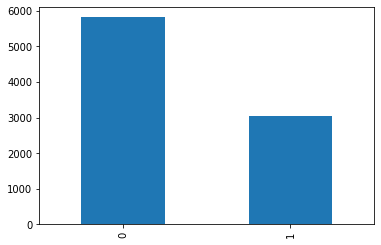

In [6]:
data['Business_Sourced'].value_counts().plot.bar()

In [7]:
#  if any dupilcates drop

data.drop_duplicates()

,ID,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,844120,M,M,Others,Graduate,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,844111,M,S,Others,Class XII,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,844101,M,M,Business,Class XII,Level 1,Level 1,2.0,Confirmation,M,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,814112,M,S,Salaried,Class XII,Level 1,Level 3,4.0,Confirmation,F,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,815351,M,M,Others,Class XII,Level 1,Level 1,2.0,Confirmation,M,2.0,1.0,230402.0,17.0,230402.0,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8839,FIN1009520,250001,250004,F,M,NaN,Graduate,Level 1,Level 2,3.0,Confirmation,M,1.0,1.0,55000.0,2.0,55000.0,2.0,0
8840,FIN1009522,814112,816118,M,M,NaN,Class XII,Level 1,Level 1,2.0,Confirmation,M,4.0,2.0,418339.0,13.0,418339.0,13.0,0
8841,FIN1009523,160017,160032,M,M,Salaried,Graduate,Level 2,Level 2,3.0,Probation,M,0.0,0.0,0.0,0.0,0.0,0.0,0
8842,FIN1009525,753012,753014,F,M,Salaried,Graduate,Level 2,Level 2,3.0,Confirmation,M,0.0,0.0,316126.0,9.0,305775.0,8.0,0


In [8]:
#checking for  missing values

data.isnull().sum()

ID                                0
Office_PIN                        0
Applicant_City_PIN                0
Applicant_Gender                 53
Applicant_Marital_Status         59
Applicant_Occupation           1090
Applicant_Qualification          71
Manager_Joining_Designation       0
Manager_Current_Designation       0
Manager_Grade                     0
Manager_Status                    0
Manager_Gender                    0
Manager_Num_Application           0
Manager_Num_Coded                 0
Manager_Business                  0
Manager_Num_Products              0
Manager_Business2                 0
Manager_Num_Products2             0
Business_Sourced                  0
dtype: int64

In [9]:
# dropping row/cols with missing values


data.dropna(axis = 0 , how ='any')

,ID,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,844120,M,M,Others,Graduate,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,844111,M,S,Others,Class XII,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,844101,M,M,Business,Class XII,Level 1,Level 1,2.0,Confirmation,M,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,814112,M,S,Salaried,Class XII,Level 1,Level 3,4.0,Confirmation,F,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,815351,M,M,Others,Class XII,Level 1,Level 1,2.0,Confirmation,M,2.0,1.0,230402.0,17.0,230402.0,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8835,FIN1009516,800001,844121,M,M,Salaried,Graduate,Level 2,Level 2,3.0,Probation,M,0.0,0.0,0.0,0.0,0.0,0.0,1
8836,FIN1009517,800001,844101,M,M,Salaried,Graduate,Level 2,Level 2,3.0,Probation,M,0.0,0.0,0.0,0.0,0.0,0.0,0
8841,FIN1009523,160017,160032,M,M,Salaried,Graduate,Level 2,Level 2,3.0,Probation,M,0.0,0.0,0.0,0.0,0.0,0.0,0
8842,FIN1009525,753012,753014,F,M,Salaried,Graduate,Level 2,Level 2,3.0,Confirmation,M,0.0,0.0,316126.0,9.0,305775.0,8.0,0


In [10]:
data.dropna(axis = 1, how = 'any')

'''
some of the missing rows ans cols are dropped
'''

'\nsome of the missing rows ans cols are dropped\n'

In [11]:
# imputing  missing values
'''
Applicant_Gender                 53
Applicant_Marital_Status         59
Applicant_Occupation           1090
Applicant_Qualification          71

as these are categorical var , we impute them with mode

'''

print(data['Applicant_Gender'].mode())
data['Applicant_Gender'].fillna(value = (data['Applicant_Gender'].mode()[0]), inplace=True)


print(data['Applicant_Marital_Status'].mode())
data['Applicant_Marital_Status'].fillna(value = (data['Applicant_Marital_Status'].mode()[0]), inplace=True)


print(data['Applicant_Occupation'].mode())
data['Applicant_Occupation'].fillna(value = (data['Applicant_Occupation'].mode()[0]), inplace=True)


print(data['Applicant_Qualification'].mode())
data['Applicant_Qualification'].fillna(value = (data['Applicant_Qualification'].mode()[0]), inplace=True)


data.isnull().sum()

0    M
dtype: object
0    M
dtype: object
0    Salaried
dtype: object
0    Class XII
dtype: object


ID                             0
Office_PIN                     0
Applicant_City_PIN             0
Applicant_Gender               0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Business_Sourced               0
dtype: int64

In [12]:
print(data['Applicant_Gender'].value_counts())
print('_____________________________________________')
print(data['Applicant_Marital_Status'].value_counts())
print('_____________________________________________')
print(data['Applicant_Occupation'].value_counts())
print('_____________________________________________')
print(data['Applicant_Qualification'].value_counts())

M    6709
F    2135
Name: Applicant_Gender, dtype: int64
_____________________________________________
M    5792
S    3042
W       6
D       4
Name: Applicant_Marital_Status, dtype: int64
_____________________________________________
Salaried         4636
Business         2157
Others           1809
Self Employed     146
Student            96
Name: Applicant_Occupation, dtype: int64
_____________________________________________
Class XII                                                           5497
Graduate                                                            2958
Class X                                                              195
Others                                                               116
Masters of Business Administration                                    71
Associate / Fellow of Institute of Chartered Accountans of India       3
Associate/Fellow of Insurance Institute of India                       1
Professional Qualification in Marketing                   

In [13]:
data.dtypes

ID                              object
Office_PIN                       int64
Applicant_City_PIN               int64
Applicant_Gender                object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [14]:
#checking for replacing the category names with needed one

temp = ['ID', 'Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation', 'Applicant_Qualification', 'Manager_Joining_Designation', 'Manager_Current_Designation', 'Manager_Status', 'Manager_Gender']

for i in temp:
    print('Value count in ',i,'\n')
    print(data[i].value_counts())
    print('_________________________________________')

Value count in  ID 

FIN1007476    1
FIN1006390    1
FIN1006082    1
FIN1007085    1
FIN1007644    1
             ..
FIN1007049    1
FIN1002085    1
FIN1001048    1
FIN1001957    1
FIN1008607    1
Name: ID, Length: 8844, dtype: int64
_________________________________________
Value count in  Applicant_Gender 

M    6709
F    2135
Name: Applicant_Gender, dtype: int64
_________________________________________
Value count in  Applicant_Marital_Status 

M    5792
S    3042
W       6
D       4
Name: Applicant_Marital_Status, dtype: int64
_________________________________________
Value count in  Applicant_Occupation 

Salaried         4636
Business         2157
Others           1809
Self Employed     146
Student            96
Name: Applicant_Occupation, dtype: int64
_________________________________________
Value count in  Applicant_Qualification 

Class XII                                                           5497
Graduate                                                            2958


### seperating indepedent and dependent variables

In [15]:
data.head(20)

,ID,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,844120,M,M,Others,Graduate,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,844111,M,S,Others,Class XII,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,844101,M,M,Business,Class XII,Level 1,Level 1,2.0,Confirmation,M,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,814112,M,S,Salaried,Class XII,Level 1,Level 3,4.0,Confirmation,F,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,815351,M,M,Others,Class XII,Level 1,Level 1,2.0,Confirmation,M,2.0,1.0,230402.0,17.0,230402.0,17.0,0
5,FIN1000006,814112,814114,M,S,Others,Class XII,Level 1,Level 1,2.0,Confirmation,M,0.0,0.0,247118.0,24.0,247118.0,24.0,1
6,FIN1000007,842001,844118,M,M,Business,Class XII,Level 1,Level 1,2.0,Confirmation,M,0.0,0.0,315119.0,27.0,315119.0,27.0,1
7,FIN1000008,800001,844103,M,M,Salaried,Class XII,Level 1,Level 1,2.0,Confirmation,M,5.0,4.0,117358.0,9.0,117358.0,9.0,0
8,FIN1000009,209625,206451,M,M,Business,Graduate,Level 1,Level 2,3.0,Confirmation,M,0.0,0.0,244028.0,17.0,244028.0,17.0,1
9,FIN1000010,211001,212218,M,M,Others,Class XII,Level 1,Level 3,4.0,Confirmation,M,0.0,0.0,851557.0,39.0,851557.0,39.0,1


In [16]:
#change the datatype Business_Sourced

data = data.astype({'Business_Sourced':'object'})
data.dtypes

ID                              object
Office_PIN                       int64
Applicant_City_PIN               int64
Applicant_Gender                object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                object
dtype: object

### seperating independent and dependent var 

In [17]:
x = data.drop(['ID', 'Business_Sourced'], axis =1)
y = data['Business_Sourced']
x.shape, y.shape

((8844, 17), (8844,))

### splitting the data

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 50)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6633, 17), (2211, 17), (6633,), (2211,))

### normalising (min_max_scaler)
   as the sklearn requires the values to be btw 0 and 1, so we normalise the data, and we can apply these on categorical data, so encode it to numeric

In [19]:
data = pd.get_dummies(data)

In [20]:
from sklearn.preprocessing import MinMaxScaler as mms
scaler = mms()

In [21]:
x_train = pd.get_dummies(x_train)
x_test =pd.get_dummies(x_test)
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)
x_train.head(), x_test.head(),y_train.head(), y_test.head()


(      Office_PIN  Applicant_City_PIN  Manager_Grade  Manager_Num_Application  \
 2365      781005              781006            3.0                      9.0   
 5313      285001              285123            2.0                      6.0   
 2828      814112              814133            2.0                      3.0   
 6862      452003              452009            3.0                      1.0   
 3384      271201              271201            3.0                      3.0   
 
       Manager_Num_Coded  Manager_Business  Manager_Num_Products  \
 2365                3.0          375709.0                  23.0   
 5313                0.0               0.0                   0.0   
 2828                0.0          173229.0                  15.0   
 6862                0.0               0.0                   0.0   
 3384                0.0               0.0                   0.0   
 
       Manager_Business2  Manager_Num_Products2  Applicant_Gender_F  ...  \
 2365           375709.0  

In [22]:
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_train_scaled.head()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Applicant_Gender_F,...,Manager_Joining_Designation_Other,Manager_Current_Designation_Level 1,Manager_Current_Designation_Level 2,Manager_Current_Designation_Level 3,Manager_Current_Designation_Level 4,Manager_Current_Designation_Level 5,Manager_Status_Confirmation,Manager_Status_Probation,Manager_Gender_F,Manager_Gender_M
0,0.905416,0.757636,0.222222,0.5625,0.333333,0.166772,0.227723,0.166772,0.227723,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.236131,0.197731,0.111111,0.3750,0.000000,0.069022,0.000000,0.069022,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.950089,0.795040,0.111111,0.1875,0.000000,0.114092,0.148515,0.114092,0.148515,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.461476,0.386163,0.222222,0.0625,0.000000,0.069022,0.000000,0.069022,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.217510,0.182012,0.222222,0.1875,0.000000,0.069022,0.000000,0.069022,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [23]:
x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)
x_test_scaled.head()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Applicant_Gender_F,...,Manager_Joining_Designation_Other,Manager_Current_Designation_Level 1,Manager_Current_Designation_Level 2,Manager_Current_Designation_Level 3,Manager_Current_Designation_Level 4,Manager_Current_Designation_Level 5,Manager_Status_Confirmation,Manager_Status_Probation,Manager_Gender_F,Manager_Gender_M
0,0.905416,0.901189,0.222222,0.181818,0.142857,0.086400,0.079208,0.086400,0.079208,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.570906,0.567305,0.222222,0.136364,0.285714,0.088124,0.079208,0.088124,0.079208,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.931048,0.955602,0.111111,0.045455,0.000000,0.078441,0.059406,0.078441,0.059406,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.149785,0.149183,0.222222,0.136364,0.142857,0.078347,0.099010,0.078347,0.099010,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.570906,0.567500,0.222222,0.272727,0.142857,0.164633,0.178218,0.164633,0.178218,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## imporiting logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression as logReg
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score

In [25]:
# creating instance
logreg = logReg()

#fit the model

#logreg.fit(x_train, y_train)
x_train.shape, y_train.shape
y_train.head(100)

,0,1
2365,1,0
5313,1,0
2828,1,0
6862,0,1
3384,1,0
...,...,...
6776,1,0
4768,1,0
8550,1,0
3581,1,0
